[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [1]:
import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from lstm_embeddings import *
from common_helpers import *
from plotting_helper import *

In [2]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
IMG_PATH = '/content/drive/MyDrive/melSpectrogram'

In [3]:
gpu, cpu = get_devices()

In [4]:
txt_only_results = run_k_fold(gpu, data, max_seq_len=75, fusion=FusionTypes.TXT, k_folds=5,
               epochs=15, balance_classes=True, embedding_dim=100,
               dropout_level=0.25, lr=4e-4,
               hidden_dim=64, n_layers=5, clip_at=1.0,
               word_threshold=10, batch_size=32)

Running Text Only Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Losses - Train : 3.459 / Validation : 3.424
Time for epoch : 1.879781 seconds
Epoch 2 / 15


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 3.458 / Validation : 3.423
Time for epoch : 1.814712 seconds
Epoch 3 / 15
Losses - Train : 3.445 / Validation : 3.402
Time for epoch : 1.817984 seconds
Epoch 4 / 15
Losses - Train : 3.383 / Validation : 3.363
Time for epoch : 1.832373 seconds
Epoch 5 / 15
Losses - Train : 3.374 / Validation : 3.381
Time for epoch : 1.830558 seconds
Epoch 6 / 15
Losses - Train : 3.346 / Validation : 3.354
Time for epoch : 1.844052 seconds
Epoch 7 / 15
Losses - Train : 3.295 / Validation : 3.400
Time for epoch : 1.824697 seconds
Epoch 8 / 15
Losses - Train : 3.278 / Validation : 3.416
Time for epoch : 1.865301 seconds
Epoch 9 / 15
Losses - Train : 3.245 / Validation : 3.309
Time for epoch : 1.827234 seconds
Epoch 10 / 15
Losses - Train : 3.238 / Validation : 3.344
Time for epoch : 1.832646 seconds
Epoch 11 / 15
Losses - Train : 3.211 / Validation : 3.323
Time for epoch : 1.862726 seconds
Epoch 12 / 15
Losses - Train : 3.203 / Validation : 3.355
Time for epoch : 1.835859 seconds
Epoch 13 

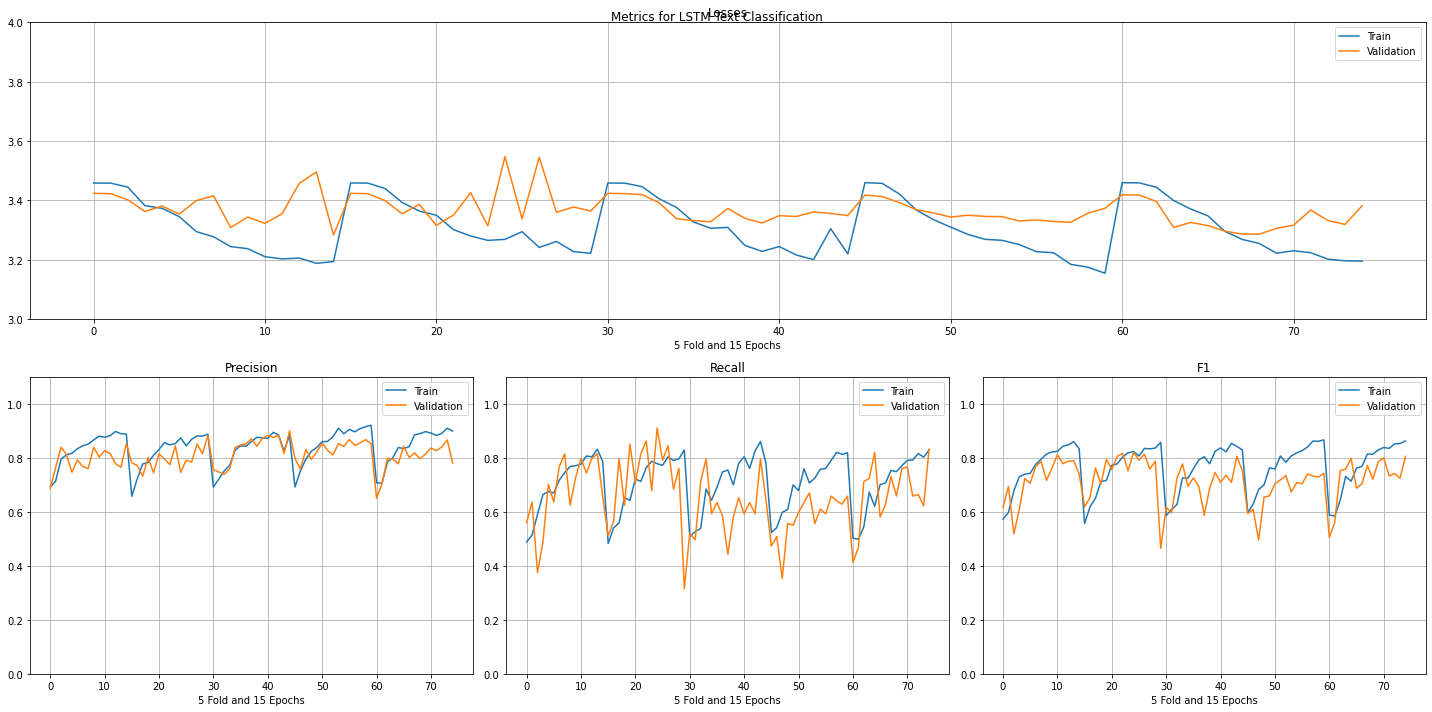

In [5]:
plot_results(txt_only_results[0], 'LSTM Text Classification')

In [6]:
txt_only_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
9,0.823715,0.820375,0.874161,0.746341,0.778774,0.910714,3.268994,3.547600
7,0.804091,0.816901,0.848837,0.775401,0.763827,0.863095,3.280361,3.426198
11,0.835404,0.813754,0.869144,0.784530,0.804185,0.845238,3.241669,3.545536
10,0.824089,0.812121,0.876897,0.827160,0.777280,0.797619,3.210567,3.322858
13,0.842951,0.806061,0.825465,0.815951,0.861194,0.796407,3.304891,3.356178
...,...,...,...,...,...,...,...,...
1,0.584427,0.561151,0.706131,0.702703,0.498507,0.467066,3.459261,3.418197
2,0.678112,0.518519,0.796371,0.840000,0.590433,0.375000,3.445054,3.402205
0,0.588133,0.505495,0.707983,0.650943,0.502985,0.413174,3.459999,3.419046
2,0.683135,0.495798,0.795635,0.830986,0.598507,0.353293,3.422040,3.393176


In [7]:
mfcc_fusion_results = run_k_fold(gpu, data, max_seq_len=75, fusion=FusionTypes.MFCC, k_folds=5,
               epochs=15, balance_classes=True, embedding_dim=100,
               dropout_level=0.25, lr=4e-4,
               hidden_dim=64, n_layers=5, clip_at=1.0,
               word_threshold=10, batch_size=32)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Losses - Train : 3.459 / Validation : 3.424
Time for epoch : 1.892549 seconds
Epoch 2 / 15


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 3.459 / Validation : 3.422
Time for epoch : 1.878143 seconds
Epoch 3 / 15
Losses - Train : 3.457 / Validation : 3.400
Time for epoch : 1.897033 seconds
Epoch 4 / 15
Losses - Train : 3.413 / Validation : 3.360
Time for epoch : 1.922851 seconds
Epoch 5 / 15
Losses - Train : 3.357 / Validation : 3.313
Time for epoch : 1.892048 seconds
Epoch 6 / 15
Losses - Train : 3.313 / Validation : 3.340
Time for epoch : 1.884513 seconds
Epoch 7 / 15
Losses - Train : 3.283 / Validation : 3.310
Time for epoch : 1.919965 seconds
Epoch 8 / 15
Losses - Train : 3.261 / Validation : 3.326
Time for epoch : 1.896646 seconds
Epoch 9 / 15
Losses - Train : 3.241 / Validation : 3.307
Time for epoch : 1.903141 seconds
Epoch 10 / 15
Losses - Train : 3.227 / Validation : 3.364
Time for epoch : 1.876605 seconds
Epoch 11 / 15
Losses - Train : 3.234 / Validation : 3.332
Time for epoch : 1.885051 seconds
Epoch 12 / 15
Losses - Train : 3.232 / Validation : 3.444
Time for epoch : 1.889801 seconds
Epoch 13 

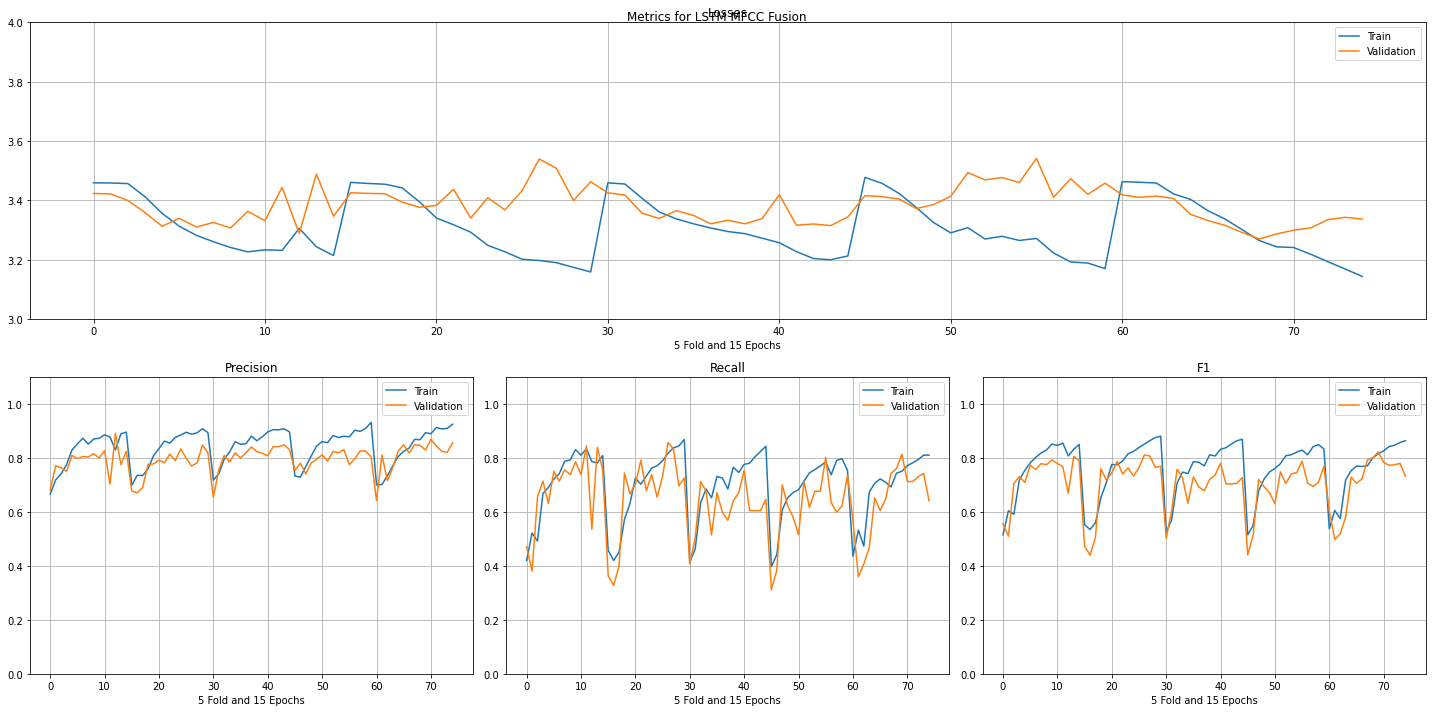

In [8]:
plot_results(mfcc_fusion_results[0], 'LSTM MFCC Fusion')

In [9]:
mfcc_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
9,0.815896,0.821752,0.893428,0.829268,0.750746,0.814371,3.243962,3.287212
11,0.851362,0.811268,0.887987,0.770053,0.817638,0.857143,3.197789,3.539873
12,0.864198,0.806916,0.893142,0.782123,0.837070,0.833333,3.190426,3.508145
13,0.832140,0.805714,0.889456,0.774725,0.781764,0.839286,3.244150,3.488851
8,0.800643,0.801262,0.867596,0.846667,0.743284,0.760479,3.265054,3.270287
...,...,...,...,...,...,...,...,...
0,0.524621,0.501845,0.717617,0.653846,0.413433,0.407186,3.459467,3.425716
1,0.605598,0.497925,0.701375,0.810811,0.532836,0.359281,3.461489,3.410496
0,0.552846,0.472868,0.698630,0.677778,0.457399,0.363095,3.461000,3.426005
0,0.515005,0.440678,0.732782,0.753623,0.397015,0.311377,3.477828,3.416238


In [11]:
mel_fusion_results = run_k_fold(gpu, data, max_seq_len=75, fusion=FusionTypes.MEL, k_folds=5,
               epochs=15, balance_classes=True, embedding_dim=100,
               dropout_level=0.25, lr=4e-4,
               hidden_dim=64, n_layers=2, clip_at=1.0,
               word_threshold=10, batch_size=32, img_path=IMG_PATH)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Losses - Train : 3.458 / Validation : 3.418
Time for epoch : 657.233515 seconds
Epoch 2 / 15


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Losses - Train : 3.435 / Validation : 3.374
Time for epoch : 28.000165 seconds
Epoch 3 / 15
Losses - Train : 3.385 / Validation : 3.357
Time for epoch : 27.70606 seconds
Epoch 4 / 15
Losses - Train : 3.349 / Validation : 3.347
Time for epoch : 27.828686 seconds
Epoch 5 / 15
Losses - Train : 3.312 / Validation : 3.344
Time for epoch : 27.742089 seconds
Epoch 6 / 15
Losses - Train : 3.283 / Validation : 3.349
Time for epoch : 27.557961 seconds
Epoch 7 / 15
Losses - Train : 3.264 / Validation : 3.338
Time for epoch : 27.498021 seconds
Epoch 8 / 15
Losses - Train : 3.231 / Validation : 3.327
Time for epoch : 27.443385 seconds
Epoch 9 / 15
Losses - Train : 3.209 / Validation : 3.319
Time for epoch : 27.31387 seconds
Epoch 10 / 15
Losses - Train : 3.194 / Validation : 3.326
Time for epoch : 27.392141 seconds
Epoch 11 / 15
Losses - Train : 3.179 / Validation : 3.336
Time for epoch : 27.391945 seconds
Epoch 12 / 15
Losses - Train : 3.161 / Validation : 3.323
Time for epoch : 27.488612 seconds


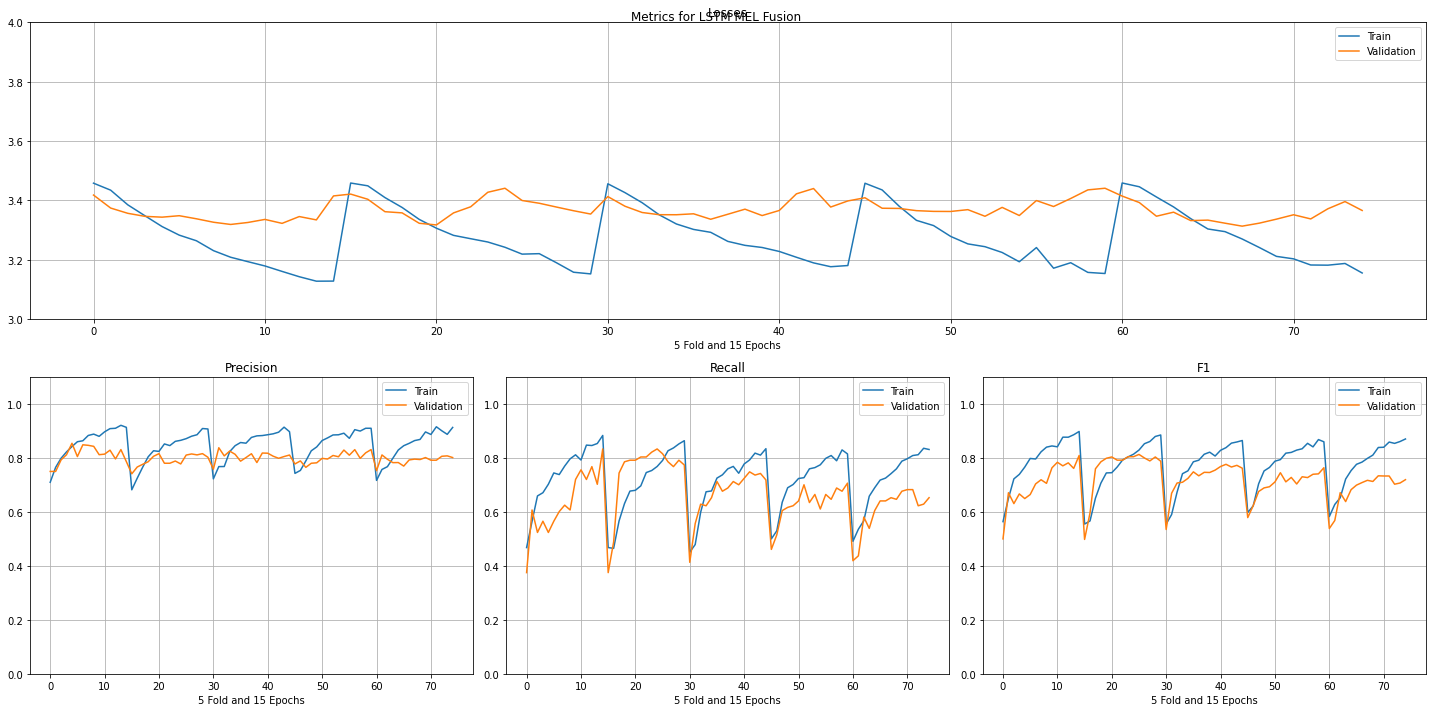

In [12]:
plot_results(mel_fusion_results[0], 'LSTM MEL Fusion')

In [13]:
mel_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
10,0.829154,0.813056,0.871499,0.810651,0.790732,0.815476,3.219251,3.399913
14,0.898176,0.809249,0.913447,0.786517,0.883408,0.833333,3.128385,3.415348
8,0.803828,0.804665,0.861538,0.788571,0.753363,0.821429,3.260080,3.427697
9,0.813935,0.804598,0.865320,0.777778,0.768311,0.833333,3.242344,3.441219
13,0.879630,0.803625,0.909091,0.815951,0.852018,0.791667,3.158258,3.365462
...,...,...,...,...,...,...,...,...
1,0.627622,0.568093,0.757384,0.811111,0.535821,0.437126,3.446215,3.393079
0,0.582817,0.538462,0.716776,0.752688,0.491045,0.419162,3.458944,3.414849
0,0.555147,0.534884,0.722488,0.758242,0.450746,0.413174,3.456278,3.413141
0,0.563964,0.500000,0.709751,0.750000,0.467862,0.375000,3.458318,3.418296
